In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_path='../data/KGHM_clear.csv'

In [3]:
df=pd.read_pickle(data_path)

In [4]:
df.head()

,Name,Date,Open,High,Low,Close,Volume,TimeDelta,CoursChange,LowHighDiff,OpenCloseDiff
0,KGHM,2000-11-17 10:00:24,26.3,26.3,26.3,26.3,10840,0.0,NaN,0.0,0.0
1,KGHM,2000-11-17 10:00:25,26.3,26.3,26.3,26.3,1035,1.0,0.0,0.0,0.0
2,KGHM,2000-11-17 10:00:26,26.3,26.3,26.3,26.3,57,1.0,0.0,0.0,0.0
3,KGHM,2000-11-17 10:03:29,26.3,26.3,26.3,26.3,20288,183.0,0.0,0.0,0.0
4,KGHM,2000-11-17 10:09:28,26.2,26.2,26.2,26.2,9,359.0,-0.1,0.0,0.0


In [5]:
df_part=df.loc[:100,:]

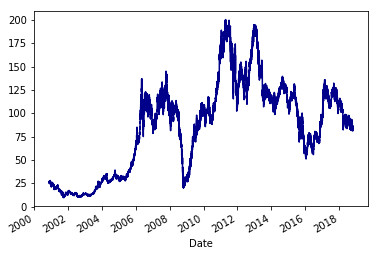

In [6]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

This method is very slow

In [7]:
# import matplotlib.pyplot as plt
# plt.plot(df['Date'], df['Open'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.

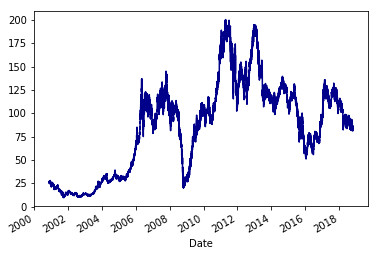

In [8]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

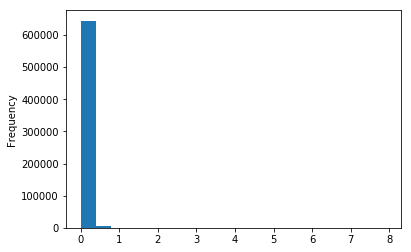

In [9]:
df.LowHighDiff[df["LowHighDiff"]!=0].plot.hist(bins=20)

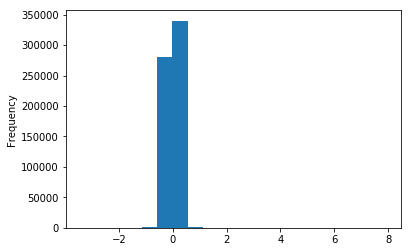

In [10]:
df.OpenCloseDiff[df["OpenCloseDiff"]!=0].plot.hist(bins=20)

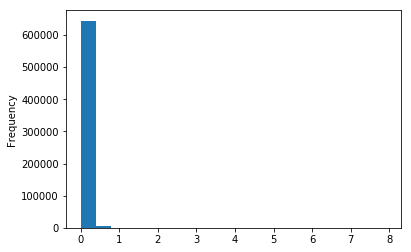

In [11]:
df.LowHighDiff[df["LowHighDiff"]!=0].plot.hist(bins=20)

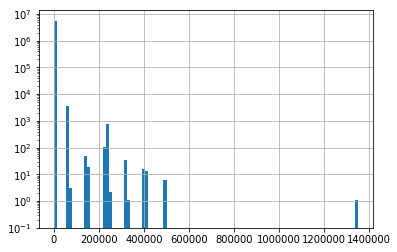

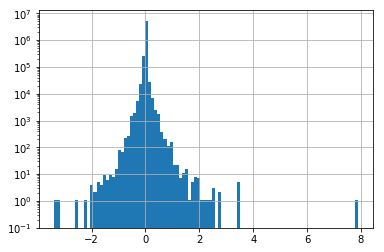

In [12]:
fig, ax = plt.subplots()
df.TimeDelta.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
fig,ax2=plt.subplots()
df.OpenCloseDiff.hist(ax=ax2, bins=100, bottom=0.1)
ax2.set_yscale('log')

In [13]:
df.OpenCloseDiff.sum()

2191.6699999999887

In [14]:
df.LowHighDiff.sum()

51162.71000000005

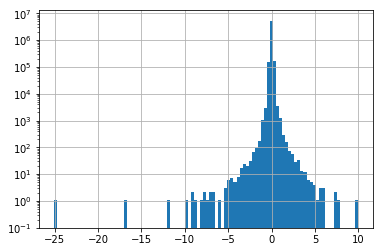

In [15]:
fig, ax = plt.subplots()
df.CoursChange.hist(ax=ax, bins=100, bottom=0.1)
# ax.title("CoursChange")
# df.CoursChange[df["CoursChange"]!=0].hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
# df.CoursChange[df["CoursChange"]!=0].plot.hist(bins=20)

Bardzo dlugo się wykonuje

In [16]:
df[["CoursChange","TimeDelta"]].corr()

,CoursChange,TimeDelta
CoursChange,1.00000,0.03465
TimeDelta,0.03465,1.00000


/home/filip/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


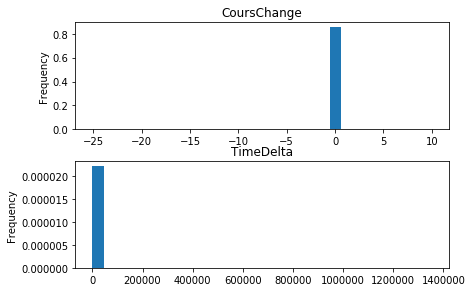

In [17]:
df2=df
df2=df2[["CoursChange","TimeDelta"]]

# This formats the plots such that they appear on separate rows
fig,axes= plt.subplots(2,1)
fig.tight_layout()

# Plot the PDF
df2.CoursChange.plot(ax=axes[0],kind='hist', normed=True, bins=30,title="CoursChange")
# plt.show()
# plt.title("CoursChange")
# plt.subplot(212)
df2.TimeDelta.plot(ax=axes[1],kind='hist', normed=True, bins=30,title="TimeDelta")

# Plot the CDF
# df2.CoursChange.plot(ax=axes[1], kind='hist', normed=True, cumulative=True, bins=30)
plt.show()


In [6]:
import plotly.plotly as py
import plotly.graph_objs as go


x = df.TimeDelta
data = [go.Histogram(x=x,
                     cumulative=dict(enabled=True),histnorm='probability',autobinx = False,xbins={'end':2500, 'size':1, 'start':0}
    )]

py.iplot(data, filename='TimeDeltaCDF')

In [12]:
x = df.CoursChange
data = [go.Histogram(x=x,
                     cumulative=dict(enabled=True),histnorm='probability',autobinx = False,xbins={'end':11, 'size':0.01, 'start':-26}
    )]

py.iplot(data, filename='CoursChangeCDF')

PlotlyRequestError: 
<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>


In [ ]:
df[df["TimeDelta"]>800000].index

In [ ]:
df.iloc[3371819]

In [ ]:
df.iloc[3371820]

Anomalia pomiędzy 2014-01-31 09:00:01 a  2014-01-15 17:04:08 . Brak danych przez 15 dni

In [ ]:
df[df["OpenCloseDiff"]>4]

In [ ]:
df.loc[4901630:4901750][["Open"]].plot()

Dziwna zmiana ceny, notowania z poprzedniego dnia się urywają, duże różnice pomiędzy low and high